load data into pandas DataFrame

csv files downloaded from: https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download&select=sign_mnist_train

In [2]:
import pandas as pd

train_set, test_set = pd.read_csv('sign_mnist_train.csv'), pd.read_csv('sign_mnist_test.csv')

In [3]:
print(train_set)
print(test_set)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776 

convert to numpy ndarray and reshape

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [4]:
import numpy as np

train_labels, train_images = train_set['label'].values, np.reshape(train_set.iloc[:, 1:].values, (27455, 28, 28)) / 255.0
test_labels, test_images = test_set['label'].values, np.reshape(test_set.iloc[:, 1:].values, (7172, 28, 28)) / 255.0

In [5]:
print(test_labels[0])
print(test_labels.shape)
print(test_images[0])
print(test_images.shape)

6
(7172,)
[[0.58431373 0.58431373 0.58823529 0.58823529 0.58823529 0.59215686
  0.59215686 0.58823529 0.59215686 0.59607843 0.59607843 0.59607843
  0.59607843 0.59607843 0.6        0.6        0.59215686 0.59607843
  0.59607843 0.6        0.59607843 0.59607843 0.59215686 0.59215686
  0.58823529 0.58823529 0.58823529 0.58431373]
 [0.58823529 0.58823529 0.58823529 0.59607843 0.59607843 0.59215686
  0.59607843 0.59607843 0.59607843 0.59607843 0.59607843 0.6
  0.60392157 0.6        0.60392157 0.60392157 0.6        0.60392157
  0.6        0.60392157 0.6        0.6        0.59607843 0.59607843
  0.59607843 0.59215686 0.58823529 0.59215686]
 [0.58823529 0.59215686 0.59215686 0.59607843 0.59607843 0.59607843
  0.6        0.6        0.59607843 0.59607843 0.59607843 0.6
  0.60392157 0.60392157 0.60784314 0.60784314 0.60392157 0.60392157
  0.60784314 0.60784314 0.60784314 0.60784314 0.60392157 0.6
  0.6        0.59215686 0.59215686 0.59607843]
 [0.58823529 0.59215686 0.59215686 0.59607843 0.596078

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the classification below the image

code from:https://www.tensorflow.org/tutorials/images/cnn#verify_the_data

Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).

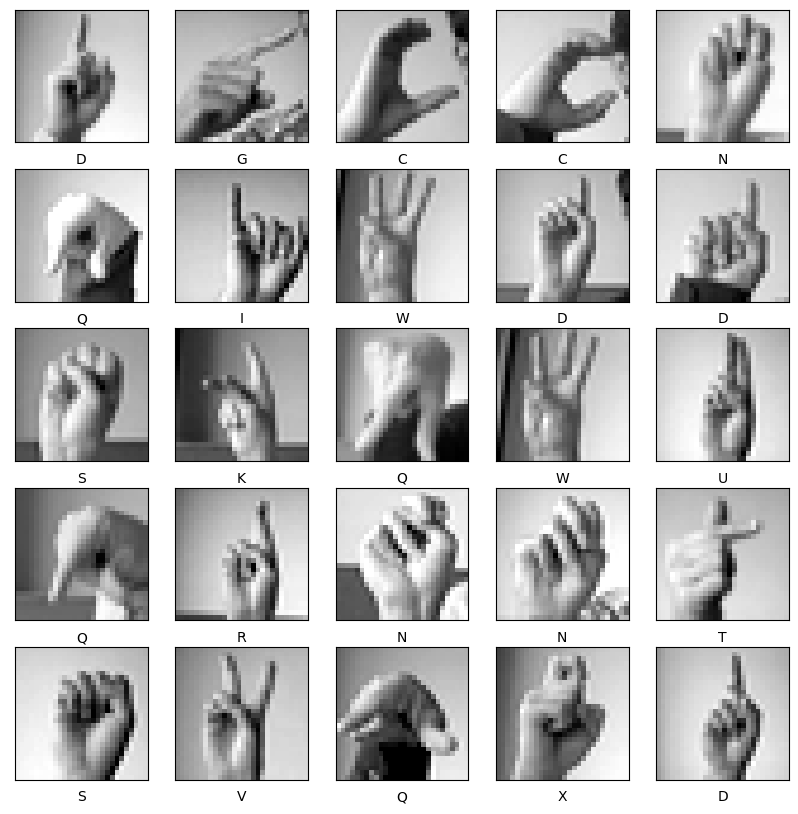

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(chr(ord('A') + train_labels[i]))
plt.show()